# Quantization of Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Introduction

[Digital signal processors](https://en.wikipedia.org/wiki/Digital_signal_processor) and general purpose processors can only perform arithmetic operations within a limited number range. So far we considered discrete signals with continuous amplitude values. These cannot be handled by processors in a straightforward manner. [Quantization](https://en.wikipedia.org/wiki/Quantization_%28signal_processing%29) is the process of mapping a continuous amplitude to a countable set of amplitude values. This refers also to the *requantization* of a signal from a large set of countable amplitude values to a smaller set. Scalar quantization is an instantaneous and memoryless operation. It can be applied to the continuous amplitude signal, also referred to as *analog signal* or to the (time-)discrete signal. The quantized discrete signal is termed as *digital signal*. The connections between the different domains is illustrated in the following for time dependent signals.

![Analog, discrete and digital signals](analog_discrete_digital.png)

### Model of the Quantization Process

In order to quantify the effects of quantizing a continuous amplitude signal, a model of the quantization process is formulated. We restrict our considerations to a discrete real-valued signal $x[k]$. In order to map the continuous amplitude to a quantized representation the following model is used

$$ x_Q[k] = g( \; \lfloor \, f(x[k]) \, \rfloor \; ) $$

where $g(\cdot)$ and $f(\cdot)$ denote real-valued mapping functions, and $\lfloor \cdot \rfloor$ a rounding operation. The quantization process can be split into two stages

1. **Forward quantization**
    The mapping $f(x[k])$ maps the signal $x[k]$ such that it is suitable for the rounding operation. This may be a scaling of the signal or a non-linear mapping. The result of the rounding operation is an integer number $\lfloor \, f(x[k]) \, \rfloor \in \mathbb{Z}$, which is termed as *quantization index*.
    
2. **Inverse quantization**
    The mapping $g(\cdot)$, maps the quantization index to the quantized value $x_Q[k]$ such that it is an approximation of $x[k]$. This may be a scaling or a non-linear operation.

The quantization error/quantization noise $e[k]$ is defined as

$$ e[k] = x_Q[k] - x[k] $$

Rearranging yields that the quantization process can be modeled by adding the quantization noise to the discrete signal

![Model of quantization process](model_quantization.png)

#### Example

In order to illustrate the introduced model, the quantization of one period of a sine signal is considered

$$ x[k] = \sin[\Omega_0 k] $$

using $f(x[k]) = 3 \cdot x[k]$ and $g(i) = \frac{1}{3} \cdot i$. The rounding is realized by the [nearest integer function](https://en.wikipedia.org/wiki/Nearest_integer_function). The quantized signal is then given as

$$ x_Q[k] = \frac{1}{3} \cdot \lfloor \, 3 \cdot \sin[\Omega_0 k] \, \rfloor $$

For ease of illustration the signals are not shown by stem plots.

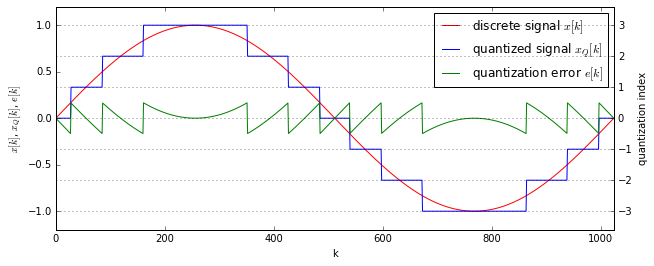

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 1024  # length of signal

# generate signal
x = np.sin(2*np.pi/N * np.arange(N))
# quantize signal
xi = np.round(3 * x)
xQ = 1/3 * xi
e = xQ - x

# plot (quantized) signals
fig, ax1 = plt.subplots(figsize=(10,4))
ax2 = ax1.twinx()

ax1.plot(x, 'r', label=r'discrete signal $x[k]$')
ax1.plot(xQ, 'b', label=r'quantized signal $x_Q[k]$')
ax1.plot(e, 'g', label=r'quantization error $e[k]$')
ax1.set_xlabel('k')
ax1.set_ylabel(r'$x[k]$, $x_Q[k]$, $e[k]$')
ax1.axis([0, N, -1.2, 1.2])
ax1.legend()

ax2.set_ylim([-3.6, 3.6])
ax2.set_ylabel('quantization index')
ax2.grid()

**Exercise**

* Investigate the quantization noise $e[k]$. Is its amplitude bounded?
* If you would represent the quantization index (shown on the right side) by a binary number, how much bits would you need?
* Try out other rounding operations like `np.floor()` and `np.ceil()` instead of `np.round()`. What changes?

### Properties

Without knowledge of the quantization error $e[k]$, the signal $x[k]$ cannot be reconstructed exactly knowing only its quantization index or quantized representation $x_Q[k]$. The quantization error $e[k]$ itself depends on the signal $x[k]$. Therefore, quantization is in general an irreversible process. The mapping from $x[k]$ to $x_Q[k]$ is furthermore non-linear, since the superposition principle does not hold in general. Summarizing, quantization is an inherently irreversible and non-linear process.

### Applications

Quantization has widespread applications in Digital Signal Processing. For instance in

* [Analog-to-Digital conversion](https://en.wikipedia.org/wiki/Analog-to-digital_converter)
* [Lossy compression](https://en.wikipedia.org/wiki/Lossy_compression) of signals (speech, music, video, ...)
* Storage and Transmission ([Pulse-Code Modulation](https://en.wikipedia.org/wiki/Pulse-code_modulation), ...)

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>